In [1]:
 from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import random

# Part 1

In [3]:
# TODO define gaussian function here
def Gaussian(x, b, sig, p=1):
    return p*np.exp(-((x - b)**2) / (2 *(sig**2)))

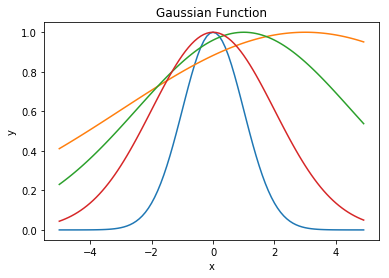

In [4]:
# TODO plot gaussians here
x = np.arange(-5, 5, 0.1)
y1 = Gaussian(x, 0, 1)
y2 = Gaussian(x, 3, 6)
y3 = Gaussian(x, 1, 3.5)
y4 = Gaussian(x, 0, 2)
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.title('Gaussian Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[  2.21383703e-09   1.00000000e+00   1.00000000e+00]
[  2.21383703e-09   1.00000000e+00   1.00000000e+00]


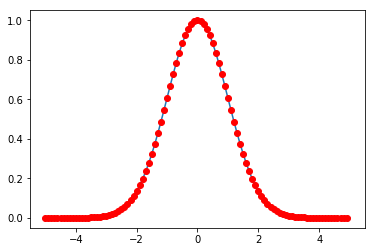

In [5]:
# TODO fit gaussians, with known parameters, here
ops, cov = optimize.curve_fit(Gaussian, x, y1)

# TODO plot result
xdata_points = np.linspace(-5, 5, 100)
print(ops)
plt.plot(xdata_points, Gaussian(xdata_points, *ops))
print(ops)
#dereference the parameters
plt.plot(x,y1, "ro")
plt.show()

In [6]:
# TODO: load data here
data = np.loadtxt("HDalpha_data", unpack=True)

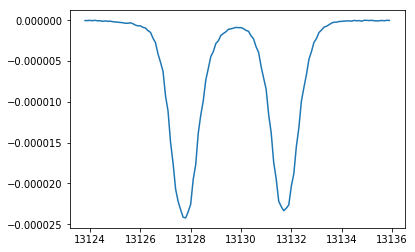

In [7]:
# TODO: plot it    
plt.plot(data[0], data[1])
plt.show()

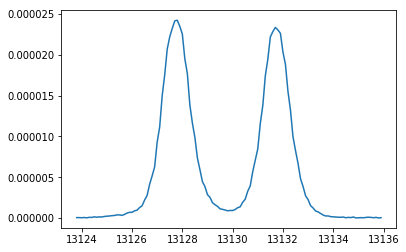

In [8]:
# TODO: plot data as emission signal
# TODO: plot it    
plt.plot(data[0], -data[1])
plt.show()

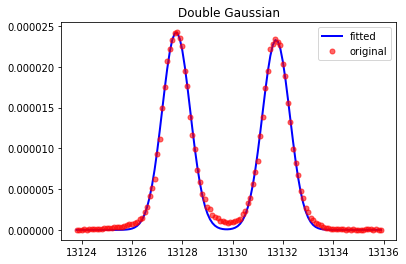

In [9]:
# TODO: fit a function to this data and plot it
def gauss(x, b1, sig1, p1, b2, sig2, p2):
    return Gaussian(x, b1, sig1, p1) + Gaussian(x, b2, sig2, p2)
    

    

ops, cov = optimize.curve_fit(gauss, data[0], -data[1], [13128, 0.2, 0.000023, 13132, 0.2, 0.000022])

# TODO plot result
plt.plot(data[0], gauss(data[0], *ops), "b-", label='fitted', lw=2)
#dereference the parameters
plt.plot(data[0], -data[1], "ro", label='original', alpha=0.6, ms=5)
plt.title('Double Gaussian')
plt.legend()
plt.show()

# Part 2

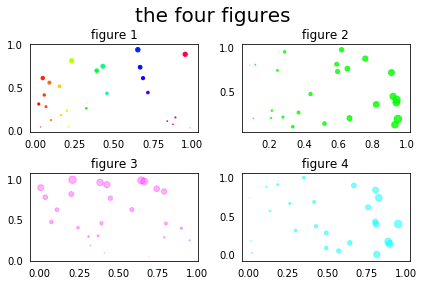

In [32]:
import operator
# TODO: part 2
points = []
for i in range(100):
    points.append((random.random(), random.random()))

f, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2)
sortedx0 = sorted(points[:25], key=operator.itemgetter(0))
sortedy0 = sorted(points[:25], key=operator.itemgetter(1))
px = []
py = []
for point in sortedy0:
    px.append(point[0])
    py.append(point[1])
color = np.array(px)*100 
area = []
for i in range(1, 26):
    area.append(np.pi * (i/10)**2)
ax0.xaxis.set_ticks_position('none') 
ax0.yaxis.set_ticks_position('none')
ax0.set_title('figure 1')
ax0.scatter(px, py, s=area, alpha=1, c=color, cmap='hsv')

sortedx2 = sorted(points[50:75], key=operator.itemgetter(0))
sortedy2 = sorted(points[50:75], key=operator.itemgetter(1))
px = []
py = []
for point in sortedy2:
    px.append(point[0])
    py.append(point[1])
area = []
for i in range(1, 26):
    area.append(np.pi * (i/6)**2)
ax2.xaxis.set_ticks_position('none') 
ax2.yaxis.set_ticks_position('none')
ax2.set_title('figure 3')
ax2.scatter(px, py, c='magenta', s=area, alpha=0.3)

sortedx1 = sorted(points[25:50], key=operator.itemgetter(0))
sortedy1 = sorted(points[25:50], key=operator.itemgetter(1))
px = []
py = []
for point in sortedx1:
    px.append(point[0])
    py.append(point[1])
area = []
for i in range(1, 26):
    area.append(np.pi * (i/6)**2)
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none')
ax1.set_title('figure 2')
ax1.scatter(px, py, c='lime', s=area, alpha=0.8)

sortedx3 = sorted(points[75:], key=operator.itemgetter(0))
sortedy3 = sorted(points[75:], key=operator.itemgetter(1))
px = []
py = []
for point in sortedx3:
    px.append(point[0])
    py.append(point[1])
area = []
for i in range(1, 26):
    area.append(np.pi * (i/6)**2)
ax3.xaxis.set_ticks_position('none') 
ax3.yaxis.set_ticks_position('none')
ax3.set_title('figure 4')
ax3.scatter(px, py, c='aqua', s=area, alpha=0.5)

plt.tight_layout()
plt.suptitle('the four figures', fontsize=20)
plt.subplots_adjust(top=0.85)
f.savefig('plots.pdf', format='pdf')
plt.show()

# Part 3

In [11]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

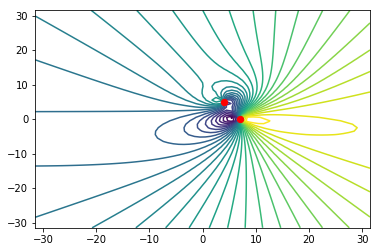

In [12]:
# TODO create arrays of information
X = np.arange(-31.5, 32.5, 1)
Y = np.arange(-31.5, 32.5, 1)
x_pos = [4, 7]
y_pos = [5, 0]
Q_vals = [-2.0, 4.0]

# TODO get flux
fluxx = flux_for_dipole(x_pos, y_pos, Q_vals, X, Y)
# TODO plot contours of the flux
plt.contour(X, Y, fluxx, 40, zorder=1)
plt.scatter(x_pos, y_pos, color='red', s=40, zorder=2)
plt.show()